##**<h1>UNIVERSIDAD ICESI**</h1>

#<b>Maestria en Inteligencia Artificial Aplicada 251</b>
##Curso :  Analisis de Datos
##Presentado por :
## William Alonso Cañas Ayala

# **DATASET :** Coffee Shop Daily Revenue Prediction Dataset
El conjunto de datos esta compuesto por 2.000 filas de datos de cafeterías, que ofrecen información detallada sobre los factores que influyen en los ingresos diarios,incluye variables operativas y ambientales claves que proporcionan una visión integral de cómo las actividades comerciales y las condiciones externas afectan el rendimiento de las ventas, aplicable para predecir los ingresos diarios de la cafetería utilizando el recuento de clientes, el gasto en marketing.

https://www.kaggle.com/datasets/himelsarder/coffee-shop-daily-revenue-prediction-dataset

**Nota** : El archivo  no contiene una columna de fecha explícita, por lo que se  asume  que los datos representan un período de tiempo continuo.

# **Pregunta Smart :** (Taller 1)

¿Cómo influye el gasto diario en marketing en los ingresos diarios de las cafeterías en un período de seis meses, considerando el número de clientes por día y el tráfico peatonal en la ubicación como variables de control?

Criterio  | Descripcion
-------------------|------------------
Especifica| La pregunta se centra en el impacto del gasto en marketing en los ingresos diarios.
Medible| Utiliza datos cuantitativos del archivo, como el gasto en marketing, el número de clientes y el tráfico peatonal
Accionable| Es posible analizar estos datos utilizando técnicas de análisis de datos y modelos estadísticos
relevante| La pregunta es relevante para entender cómo optimizar el gasto en marketing para aumentar los ingresos
Enmarcada en tiempo|  El análisis se realizará en un período de seis meses

**Objetivo** : Identificar patrones y relaciones entre el gasto en marketing y los ingresos, y cómo otras variables como el número de clientes y el tráfico peatonal pueden influir en esta relación.

# **Diccionario de Datos**

 Variable                  | Descripcion      |  Tipo de Variable
---------------------------|------------------|-------------------|
Number of Customers Per Day|Número total de clientes que visitan la cafetería|Numerica
Average Order Value|El monto promedio en dólares gastado por cada cliente durante su visita|Numerica
Operating Hours Per Day|Número total de horas que la cafetería está abierta al público|Numerica
Number of Employees| El número de empleados que trabajan en un día|Numerica
Marketing Spend Per Day| La cantidad de dinero gastado en campañas de marketing o promociones|Numerica
Location Foot Traffic| El número de personas que pasan por la cafetería por hora|Numerica
Daily_Revenue| Ingresos diarios|Numerica

**_Variabes Transformadas_**

Variable| Descripcion
--------|------------------|
Fecha_estimada|Fecha estimada para cad registro




# **Preparando Entorno**

In [20]:


# Bibliotecas para manipulación de datos
import pandas as pd
from datetime  import datetime,timedelta
import numpy as np

# bibliotecas para visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns

# bibliotecas para preprocesamiento de los datos
from sklearn.model_selection import train_test_split

from scipy import stats
from scipy.stats import skew, kurtosis

import matplotlib.pyplot as plt

def tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

def metodo_IQR(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior para los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar
    outliers = store[(dataframe[column_name] < lower_bound) | (dataframe[column_name] > upper_bound)]

    # Mostar
    print(column_name)
    print(outliers)

    return lower_bound, upper_bound

def analisUnivariado(dataframe,columname):
  # Estadisticas Descriptiva
   print(f" Analisis Univariante de {columname}:")
   print(dataframe[columname].describe())

  # Histogramas
   plt.figure(figsize=(8, 6))
   sns.histplot(dataframe[columname], kde=True)
   plt.title(f'Histograma de {columname}')
   plt.xlabel(columname)
   plt.ylabel('Frecuencia')
   plt.show()

 # Diagramas de Caja
   plt.figure(figsize=(8, 6))
   sns.boxplot(x=store[columname])
   plt.title(f'Diagramas de Caja de {columname}')
   plt.xlabel(columname)
   plt.show()
 #
   plt.figure(figsize=(10, 6))
   sns.kdeplot(dataframe[columname], shade=True)
   plt.title(f'Curva de Desnsidad de  {columname}')
   plt.xlabel(columname)
   plt.ylabel('Density')
   plt.show()

In [24]:
# Carga de datos
data = pd.read_csv("coffee_shop_revenue.csv")
store = pd.DataFrame(data)

# **Analisis exploratorio**

**Carga de datos**

In [4]:
# Información básica sobre el conjunto de datos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB
None


In [5]:
# Numero de registros
data.shape

(2000, 7)

In [6]:
#Identifica existencia de valores nulos
data.isna().sum()

,0
Number_of_Customers_Per_Day,0
Average_Order_Value,0
Operating_Hours_Per_Day,0
Number_of_Employees,0
Marketing_Spend_Per_Day,0
Location_Foot_Traffic,0
Daily_Revenue,0


**Estadisticas Descriptiva**

In [7]:
# Estadisticas descriptivas de las variable
tabla_descriptivas(data)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000
coef. variation,0.471906,0.347510,0.294729,0.470897,0.558702,0.507881,0.509148
skew,-0.000728,-0.034354,-0.050084,0.020981,0.036772,-0.050380,0.634541


**Incorporar variables tranformadas**

In [8]:
# Calculo de una fecha estimada para cada registro, asumiendo una fecha de corte 2025-02-28 la cual correspende al ultmo registro del dataset
Fecha_Referencia = datetime(2025, 2, 28)
num_registros =len(data)
fechas=[]
for i in range(num_registros):
    dias_restar = num_registros - 1 - i # Calcula cuantos dias a restar
    fecha = Fecha_Referencia - timedelta(days=dias_restar)
    fechas.append(fecha)
store['Fecha_estimada'] =fechas


**_Resumen_**  : El dataset esta compuesto por 2.000 registros, que contienen informacion diaria  de datos de cafeterías, que describen  información detallada sobre factores que influyen en los ingresos diarios,compuesto por siete (7) variables de tipo numerico, se evidencia que el  Dataset  no contiene una columna de fecha explícita, por lo que  se  asume  que los datos representan un período de tiempo continuo, para nuestro csao  tomara  el primer registro, como la fecha mas antigua, 2019-09-09- y el ultimo registro  como  la mas actual, que  en nuestro casos sera  2025-02-28 , por lo que se hace necesario realizar trasformaciones  en los datos.

El Dataset NO evidencia valores nulos

# **Analisis UNIVARIADO**  (Taller 2)

_DataSet_

In [9]:
display(store)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue,Fecha_estimada
0,152,6.74,14,4,106.62,97,1547.81,2019-09-09
1,485,4.50,12,8,57.83,744,2084.68,2019-09-10
2,398,9.09,6,6,91.76,636,3118.39,2019-09-11
3,320,8.48,17,4,462.63,770,2912.20,2019-09-12
4,156,7.44,17,2,412.52,232,1663.42,2019-09-13
...,...,...,...,...,...,...,...,...
1995,372,6.41,11,4,466.11,913,2816.85,2025-02-24
1996,105,3.01,11,7,12.62,235,337.97,2025-02-25
1997,89,5.28,16,9,376.64,310,951.34,2025-02-26
1998,403,9.41,7,12,452.49,577,4266.21,2025-02-27


**Analisis Univariado de _Number_of_Customers_Per_Day_**

 Analisis Univariante de Number_of_Customers_Per_Day:
count    2000.000000
mean      274.296000
std       129.441933
min        50.000000
25%       164.000000
50%       275.000000
75%       386.000000
max       499.000000
Name: Number_of_Customers_Per_Day, dtype: float64


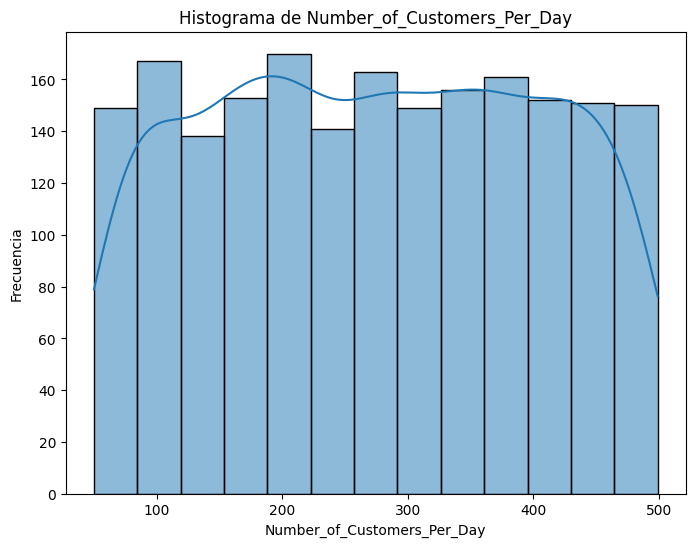

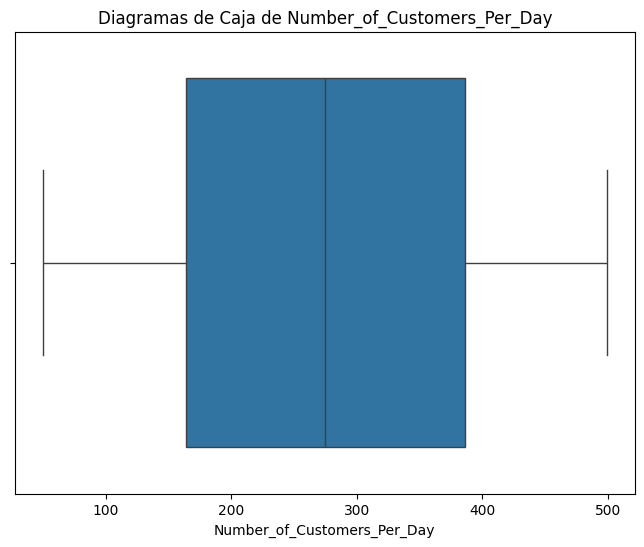

<ipython-input-2-2d0d61be2b6c>:62: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[columname], shade=True)


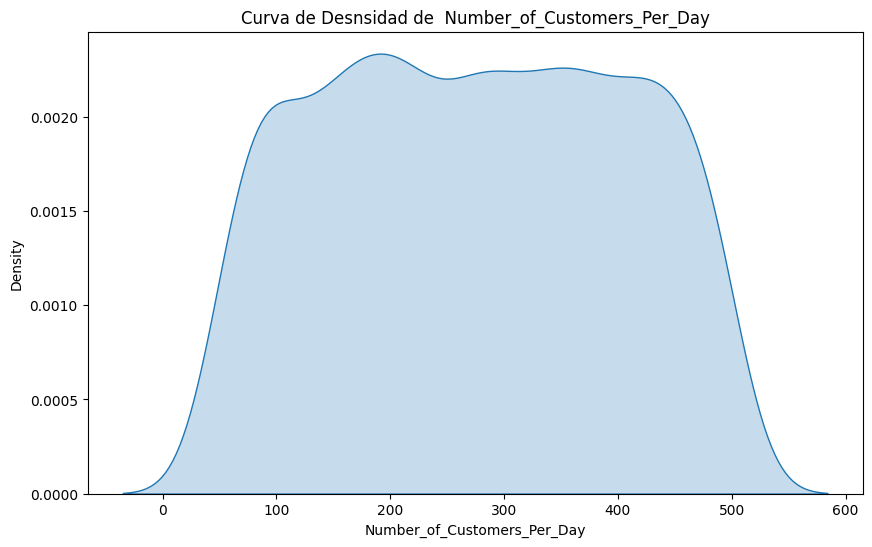

In [10]:
analisUnivariado(store,'Number_of_Customers_Per_Day')

**Analisis Univariado de _Average_Order_Value_**

 Analisis Univariante de Average_Order_Value:
count    2000.000000
mean        6.261215
std         2.175832
min         2.500000
25%         4.410000
50%         6.300000
75%         8.120000
max        10.000000
Name: Average_Order_Value, dtype: float64


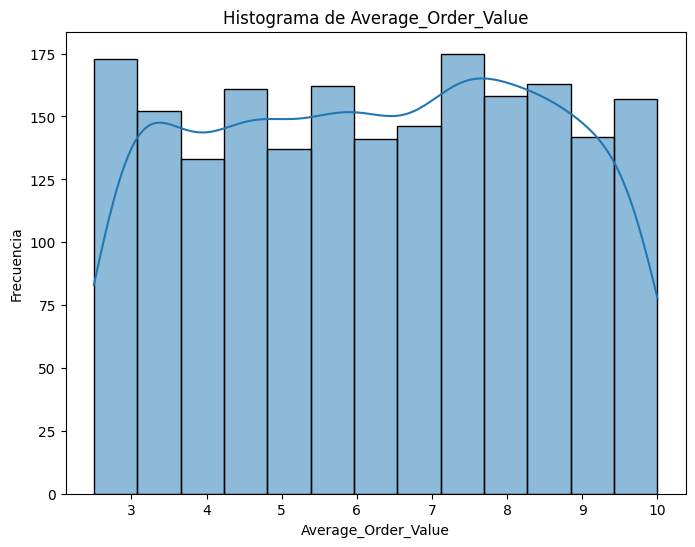

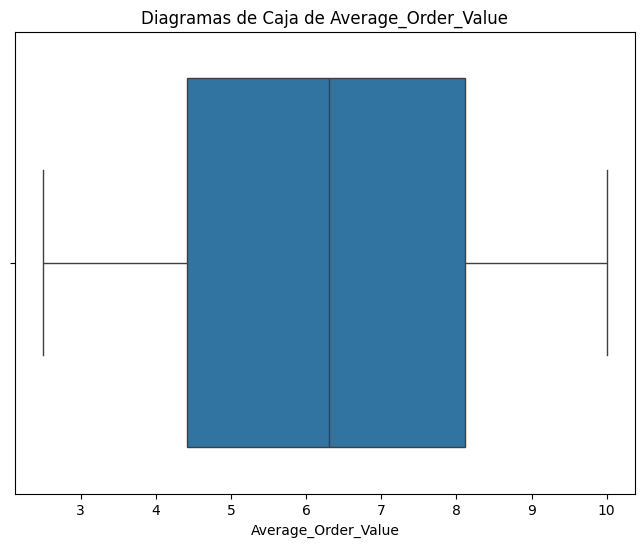

<ipython-input-21-82552d4b97e4>:60: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[columname], shade=True)


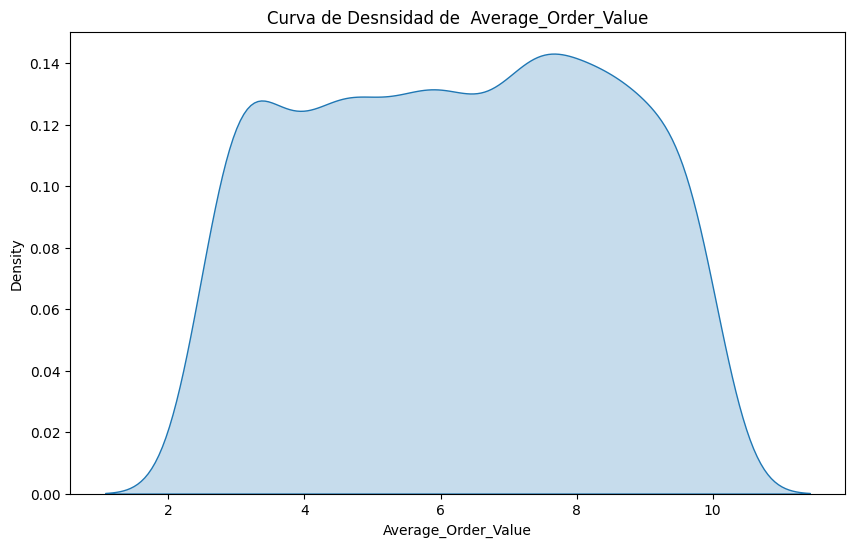

In [ ]:
analisUnivariado(store,'Average_Order_Value')

**Analisis Univariado de _Operating_Hours_Per_Day_**

 Analisis Univariante de Operating_Hours_Per_Day:
count    2000.000000
mean       11.667000
std         3.438608
min         6.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: Operating_Hours_Per_Day, dtype: float64


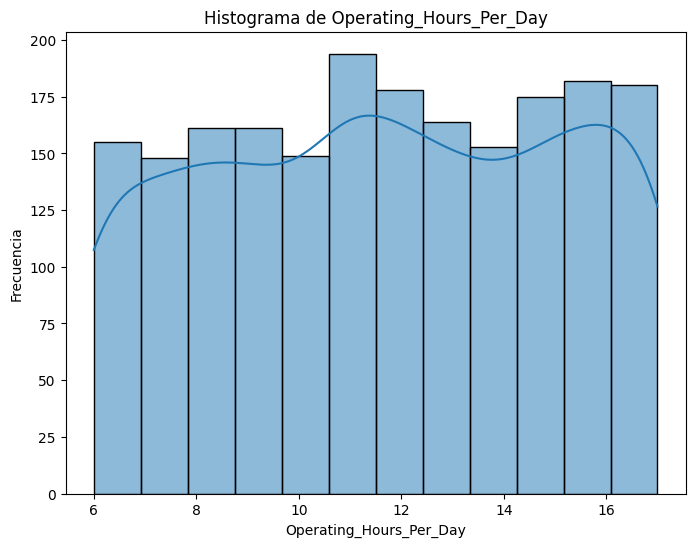

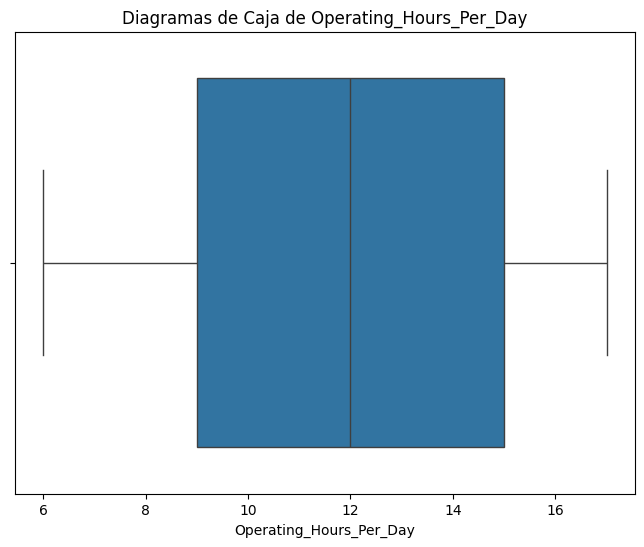

<ipython-input-21-82552d4b97e4>:60: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[columname], shade=True)


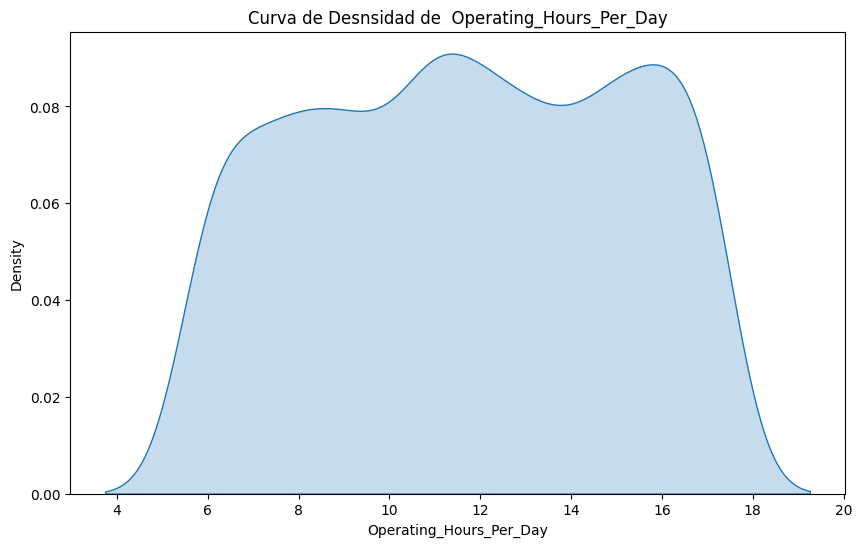

In [ ]:
analisUnivariado(store,'Operating_Hours_Per_Day')

**Analisis Univariado de _Number_of_Employees_**

 Analisis Univariante de Number_of_Employees:
count    2000.000000
mean        7.947000
std         3.742218
min         2.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        14.000000
Name: Number_of_Employees, dtype: float64


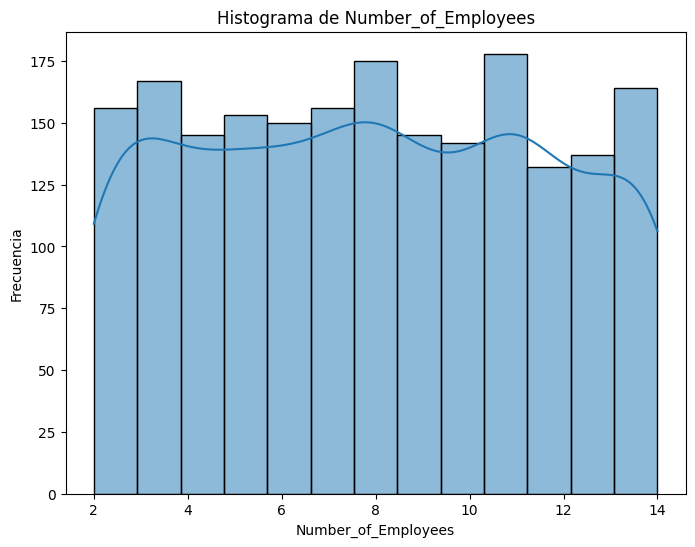

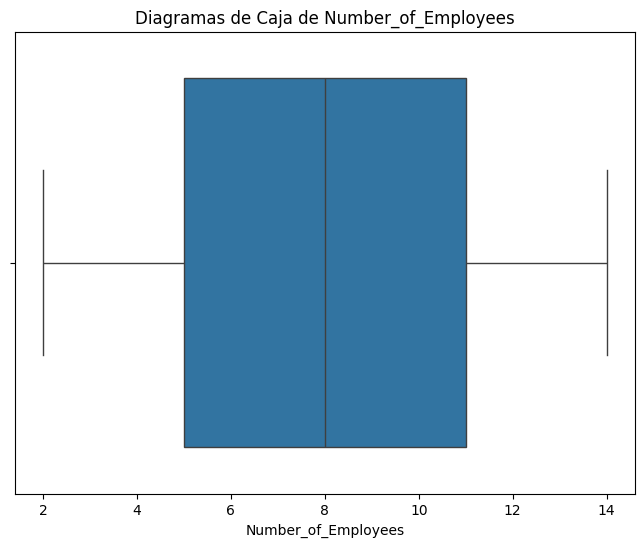

<ipython-input-21-82552d4b97e4>:60: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[columname], shade=True)


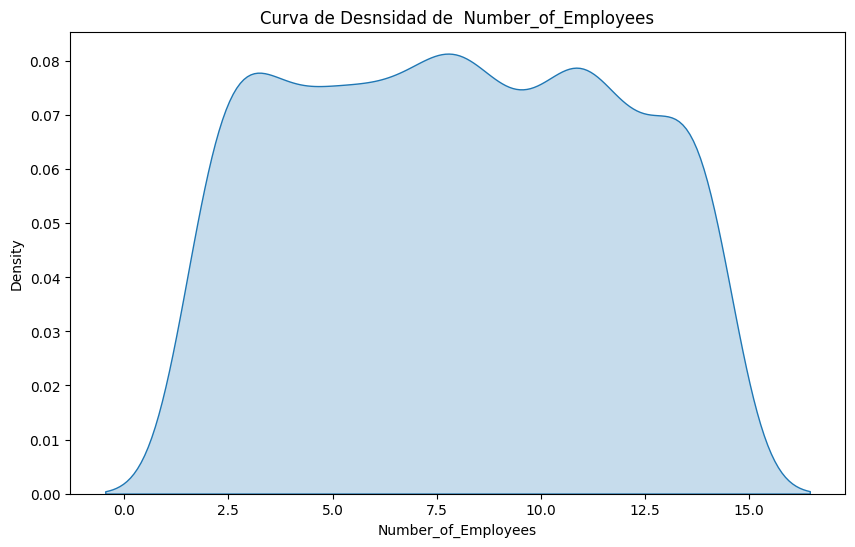

In [ ]:
analisUnivariado(store,'Number_of_Employees')

**Analisis Univariado de _Marketing_Spend_Per_Day_**

 Analisis Univariante de Marketing_Spend_Per_Day:
count    2000.000000
mean      252.614160
std       141.136004
min        10.120000
25%       130.125000
50%       250.995000
75%       375.352500
max       499.740000
Name: Marketing_Spend_Per_Day, dtype: float64


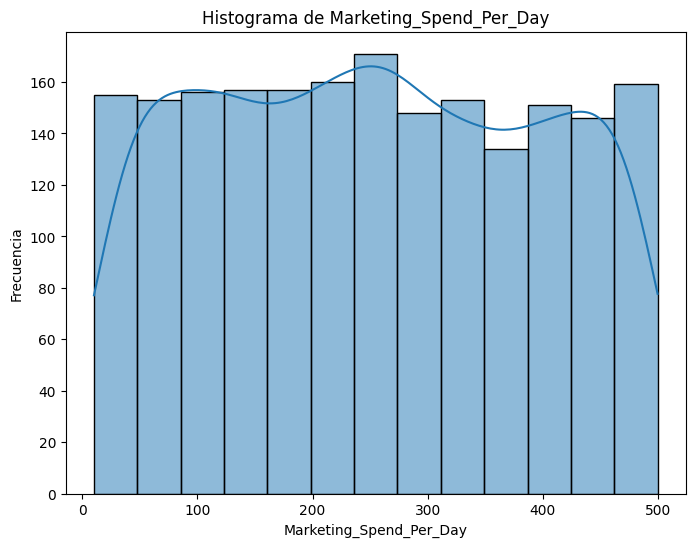

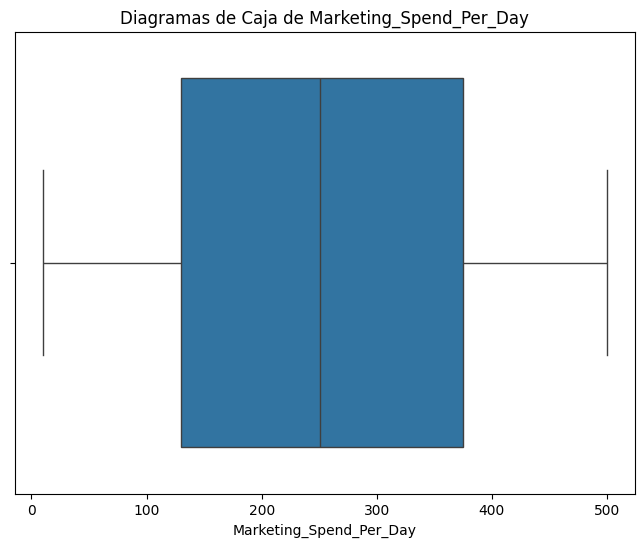

<ipython-input-21-82552d4b97e4>:60: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[columname], shade=True)


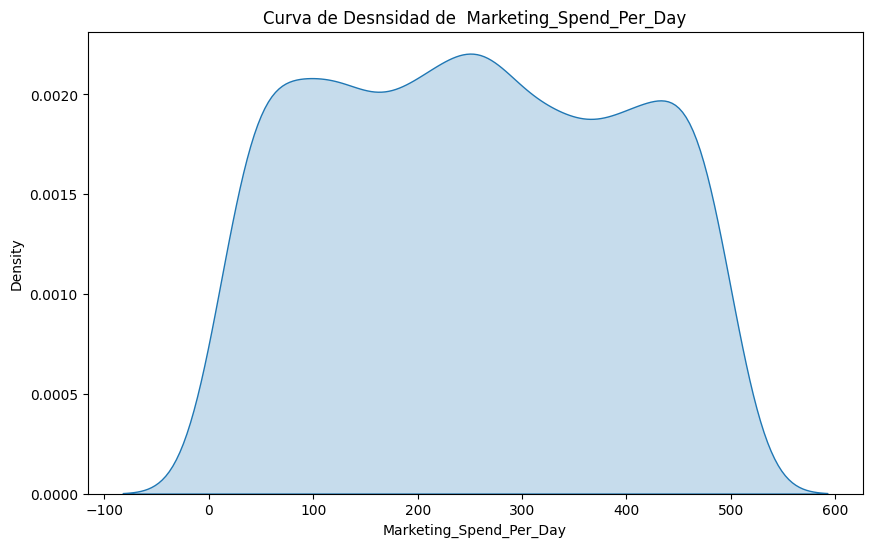

In [ ]:
analisUnivariado(store,'Marketing_Spend_Per_Day')

**Analisis Univariado de _Location_Foot_Traffic_**

 Analisis Univariante de Location_Foot_Traffic:
count    2000.000000
mean      534.893500
std       271.662295
min        50.000000
25%       302.000000
50%       540.000000
75%       767.000000
max       999.000000
Name: Location_Foot_Traffic, dtype: float64


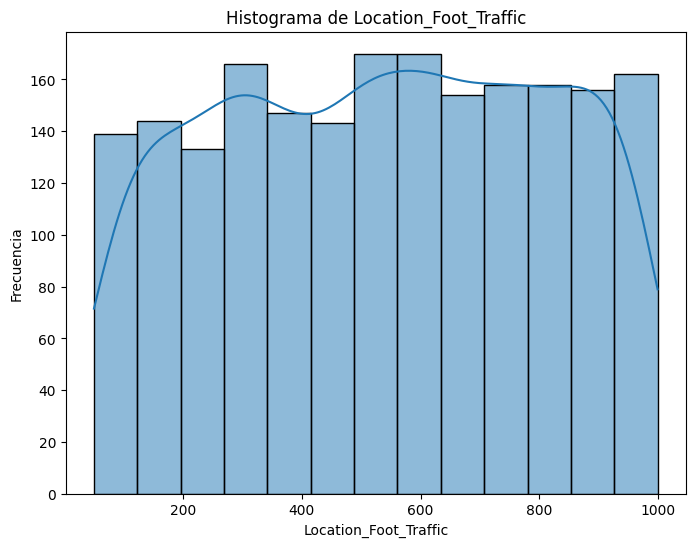

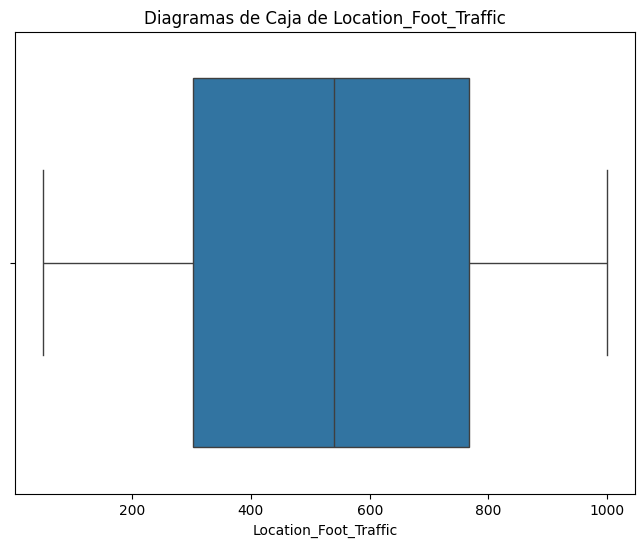

<ipython-input-21-82552d4b97e4>:60: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[columname], shade=True)


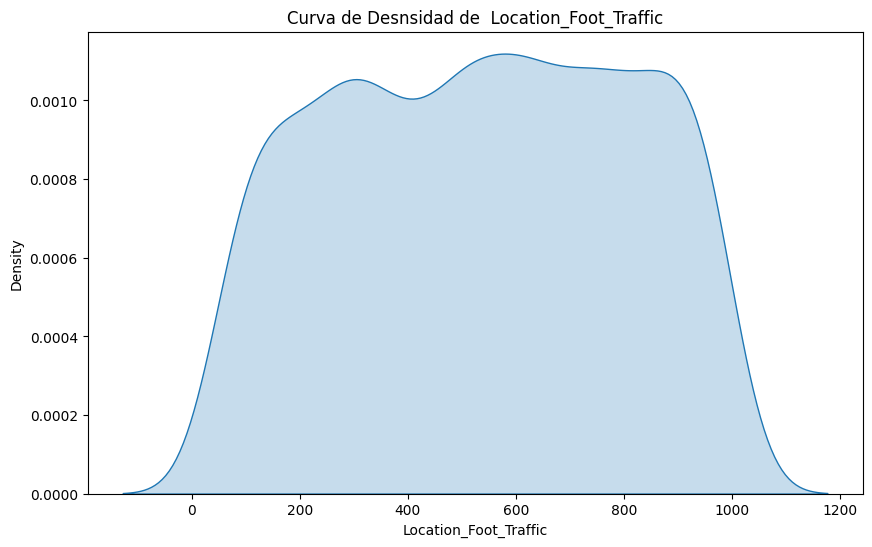

In [ ]:
analisUnivariado(store,'Location_Foot_Traffic')

**Analisis Univariado de _Daily_Revenue_**

 Analisis Univariante de Daily_Revenue:
count    2000.000000
mean     1917.325940
std       976.202746
min       -58.950000
25%      1140.085000
50%      1770.775000
75%      2530.455000
max      5114.600000
Name: Daily_Revenue, dtype: float64


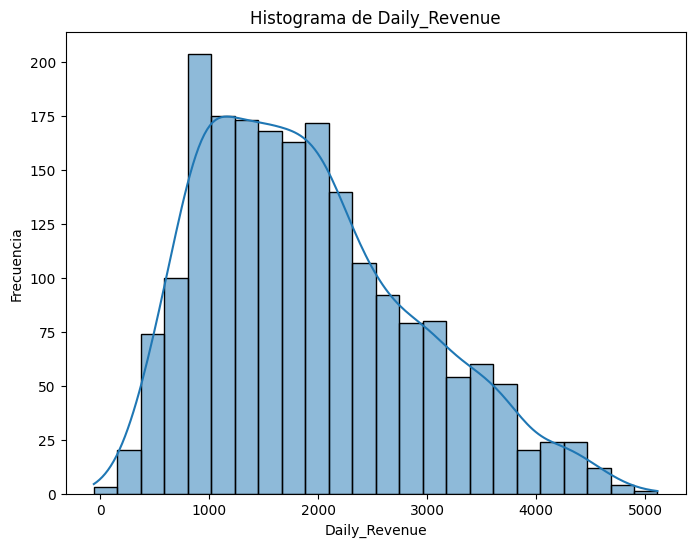

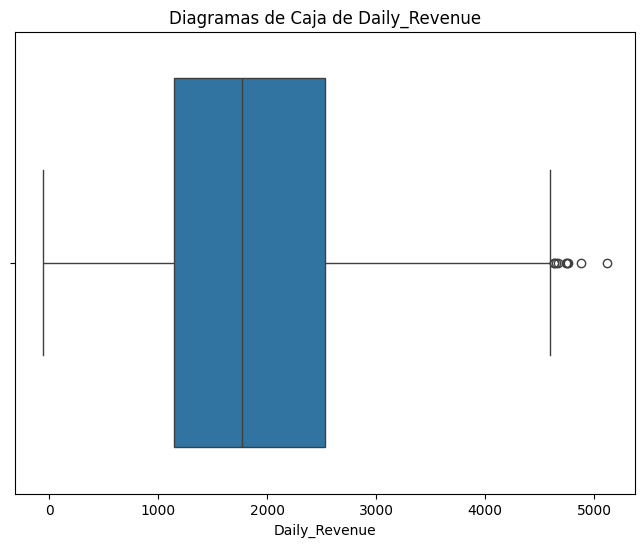

<ipython-input-21-82552d4b97e4>:60: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[columname], shade=True)


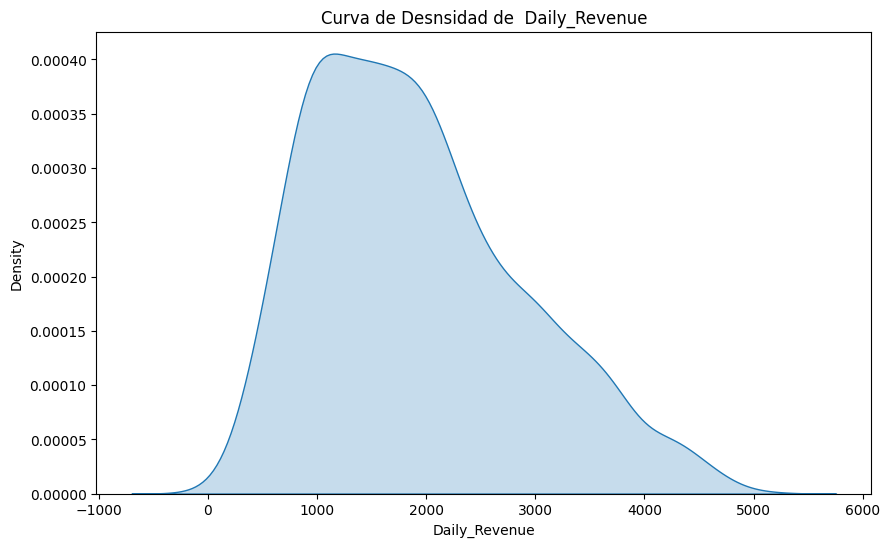

In [ ]:
analisUnivariado(store,'Daily_Revenue')

**INTERPRETACION GENERAL DEL DATASET**

En general las variables presentan una distribución bastante simétrica, con una ligera concentración de valores alrededor de la media.

La media y la mediana están muy cerca, lo que indica una distribución equilibrada, la variabilidad es moderada, como lo indica la desviación estándar y el rango intercuartílico.

No se identificaron outliers a excepcion de la variable **_Daily_Revenue_** que muestra que la distribución es asimétrica hacia la derecha, con una cola larga hacia valores más altos.

La curva de densidad confirma la asimetría y muestra una concentración de valores en el rango más bajo, con varios outliers en el rango superior.

La media y la mediana están relativamente cerca, pero la presencia de outliers eleva la media,  la variabilidad es alta, como lo indica la desviación estándar y el rango intercuartílico.

Se registras nueve (9) datos sesgados a la derecha ,lo que indica que estos  valores son  significativamente mayor que la mayoría de los otros valores en la distribución de Daily_Revenue, para el tratamiento de los valores atípicos se utilizara  método IQR.

Al identifciar los valores a tipicos se evidencia que como  no son demasiado altos se puede utilizar la Imputacion con la Mediana.

**_Tratamiento de OUTLIERS_ para  la variable Daily_Revenue**

In [11]:
# Identificacion de outliers en la variable 'Daily_Revenue' utilizando el metodo IQR
lower_bound, upper_bound = metodo_IQR(store, 'Daily_Revenue')


Daily_Revenue
      Number_of_Customers_Per_Day  Average_Order_Value  \
66                            416                 9.98   
85                            451                 9.88   
701                           494                 9.57   
1143                          473                 9.79   
1171                          495                 9.95   
1318                          484                 9.10   
1593                          453                 9.93   
1719                          495                 9.63   
1842                          465                 9.75   

      Operating_Hours_Per_Day  Number_of_Employees  Marketing_Spend_Per_Day  \
66                         17                   10                   483.07   
85                         15                   14                   493.23   
701                        13                    8                   385.76   
1143                        9                   14                   479.41   
1171      

In [12]:
#Imputación con la Mediana:
median_value = store['Daily_Revenue'].median()
store['Daily_Revenue'] = store['Daily_Revenue'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

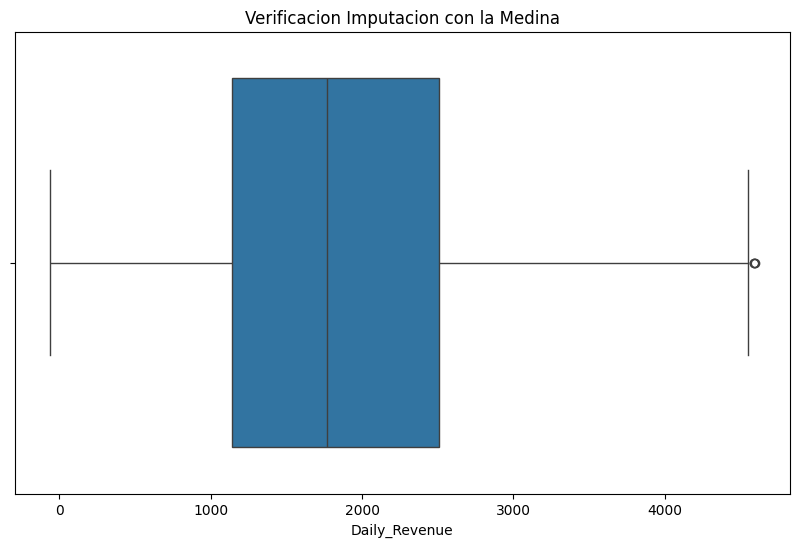

In [14]:
# Verificacion de la Imputacion
plt.figure(figsize=(10, 6))
sns.boxplot(x=store['Daily_Revenue'])
plt.title('Verificacion Imputacion con la Medina')
plt.xlabel('Daily_Revenue')
plt.show()

**VARIABLE SELECCIONADA PARA EL ANALSIS UNIVARIADO**



Los ingresos diarios son un indicador que impacta  el rendimiento financiero de una cafetería, y se  reflejan directamente la cantidad de dinero que que  se factura  cada día, lo cual es crucial para evaluar su éxito y sostenibilidad.

La predicción de los ingresos diarios es fundamental para la planificación financiera, la gestión de inventarios y la toma de decisiones estratégicas. identificar donde aplicar mejoras que aumente    los ingresos diarios puede ayudar a optimizar las operaciones y maximizar las ganancias.

Por lo anterior la variable que consideramos de importancia en el DataSet es _Daily_Revenue_ (Ingresos Diarios), esta variable esta  influenciada por por  el número de clientes, el valor promedio de los pedidos, el gasto en marketing y las horas de operación, analizar esta variable puede proporcionar información valiosa sobre cómo estos factores interactúan y afectan el rendimiento financiero.

El histograma muestra que la distribución de _Daily_Revenue_ es asimétrica hacia la derecha, con una cola larga hacia valores más altos. La curva de densidad confirma la asimetría y muestra una concentración de valores en el rango más bajo.







Analisis Univariado de la variabe Daily_Revenue, despude de tratar los datos atipicos

 Analisis Univariante de Daily_Revenue:
count    2000.000000
mean     1903.886942
std       957.329170
min       -58.950000
25%      1140.085000
50%      1770.347500
75%      2507.387500
max      4591.740000
Name: Daily_Revenue, dtype: float64


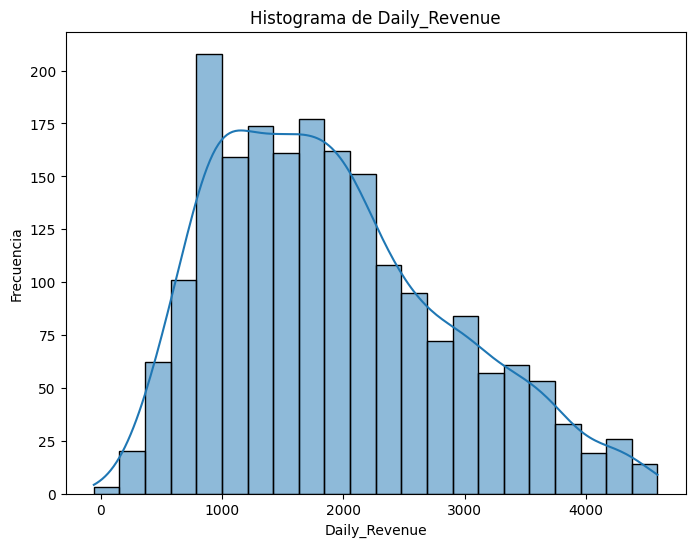

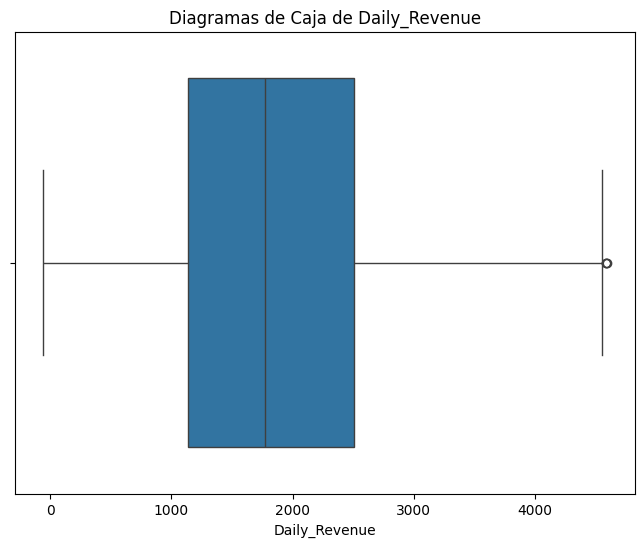

<ipython-input-2-2d0d61be2b6c>:62: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataframe[columname], shade=True)


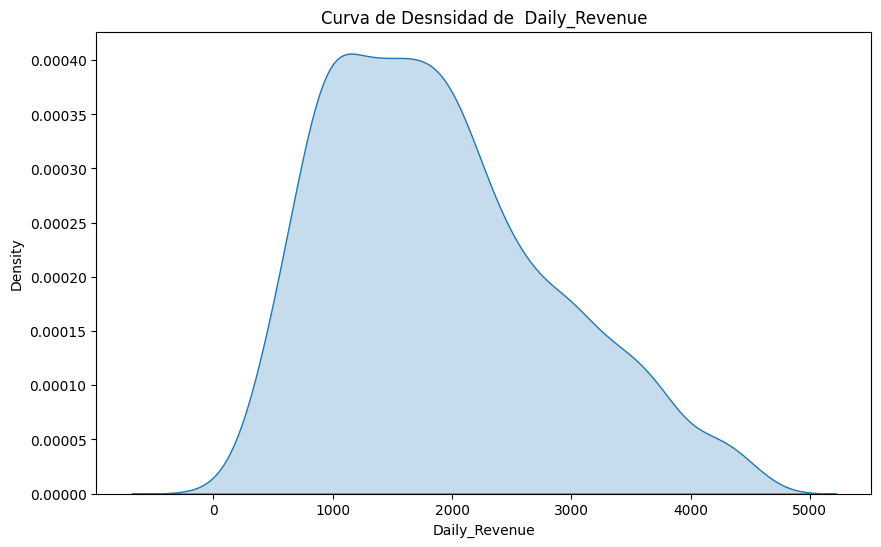

In [15]:
analisUnivariado(store,'Daily_Revenue')

# **Analisis BIVARIADO**  (Taller 3)

**Seleccion de Variables**

Se seleccionan las siguientes variables

Variable  | Descripcion
-------------------|------------------
Number_of_Customers_Per_Day|Nro. de clientes por dia
Daily_Revenue|Ingresos diarios


**Justificación**

Number_of_Customers_Per_Day: Esta variable tiene imporrtancoa  porque el número de clientes que visitan la tienda de café cada día tiene un impacto directo en los ingresos diarios.

Daily_Revenue: Esta variable es el resultado financiero que la tienda de café obtiene diariamente, y es importante entender cómo se relaciona con el número de clientes.

**Correlacion**

array([[<Axes: xlabel='Number_of_Customers_Per_Day', ylabel='Number_of_Customers_Per_Day'>,
        <Axes: xlabel='Average_Order_Value', ylabel='Number_of_Customers_Per_Day'>,
        <Axes: xlabel='Operating_Hours_Per_Day', ylabel='Number_of_Customers_Per_Day'>,
        <Axes: xlabel='Number_of_Employees', ylabel='Number_of_Customers_Per_Day'>,
        <Axes: xlabel='Marketing_Spend_Per_Day', ylabel='Number_of_Customers_Per_Day'>,
        <Axes: xlabel='Location_Foot_Traffic', ylabel='Number_of_Customers_Per_Day'>,
        <Axes: xlabel='Daily_Revenue', ylabel='Number_of_Customers_Per_Day'>],
       [<Axes: xlabel='Number_of_Customers_Per_Day', ylabel='Average_Order_Value'>,
        <Axes: xlabel='Average_Order_Value', ylabel='Average_Order_Value'>,
        <Axes: xlabel='Operating_Hours_Per_Day', ylabel='Average_Order_Value'>,
        <Axes: xlabel='Number_of_Employees', ylabel='Average_Order_Value'>,
        <Axes: xlabel='Marketing_Spend_Per_Day', ylabel='Average_Order_Value'>,
   

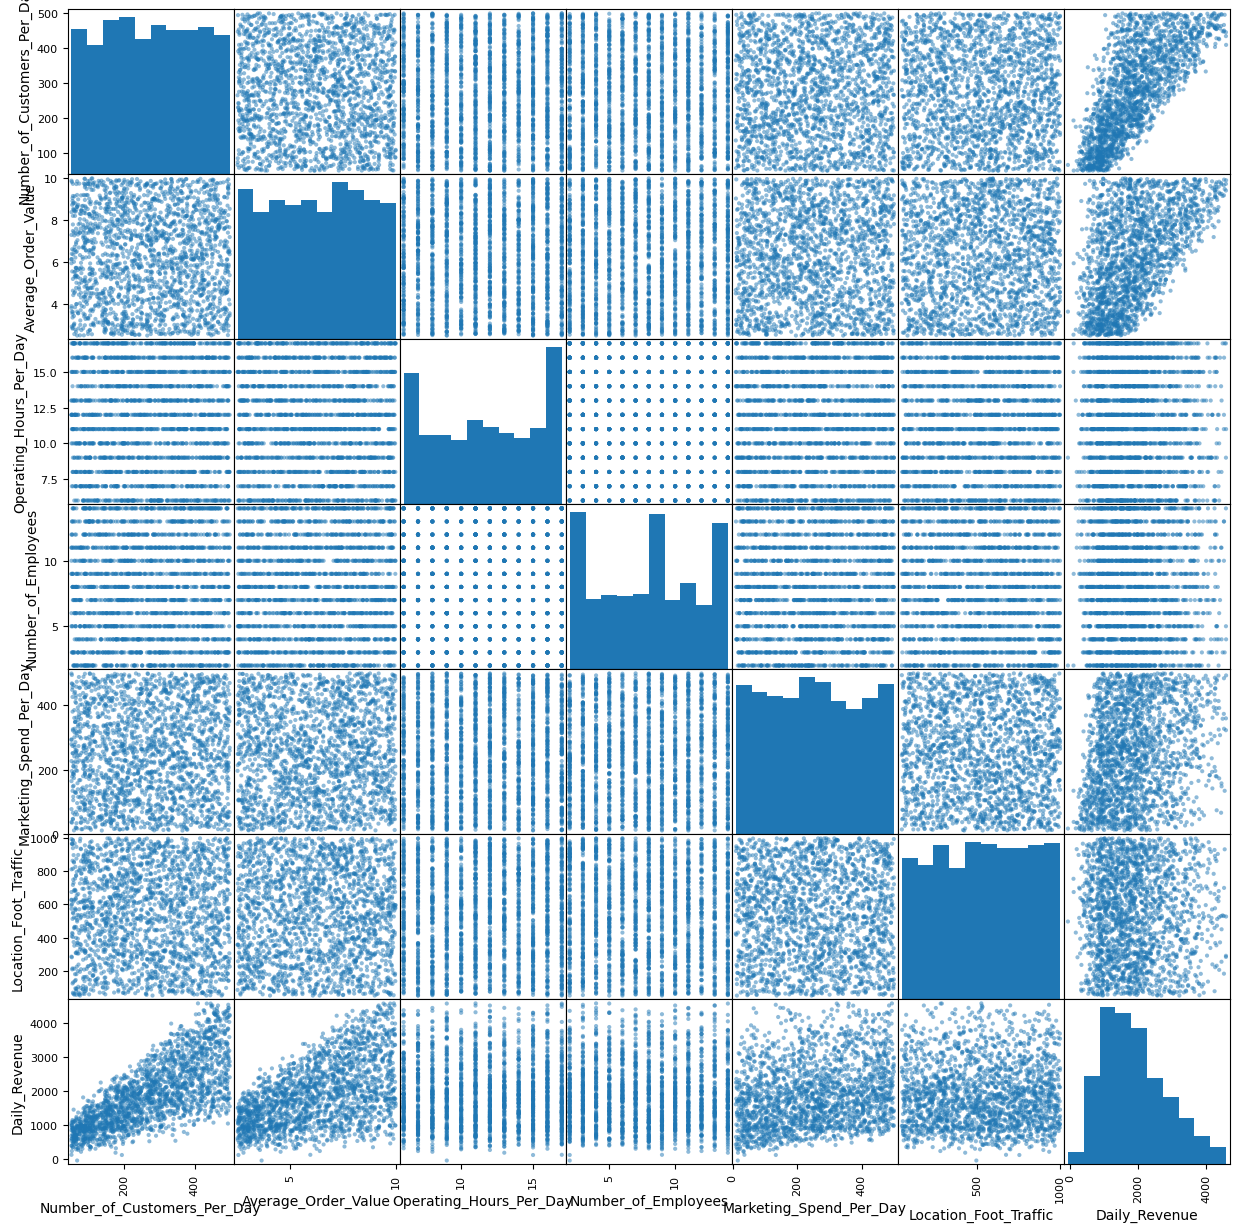

In [17]:
# Matriz de Graficos de Dispersion
pd.plotting.scatter_matrix(store, figsize=(15,15))

In [ ]:
# Calcular la correlación
correlation = store['Number_of_Customers_Per_Day'].corr(store['Daily_Revenue'])
print(f'Correlación: {correlation}')

Correlación: 0.7298292075906466


Tabla de Contingencia

In [ ]:
# Crear categorías para el número de clientes
store['Customer_Category'] = pd.cut(store['Number_of_Customers_Per_Day'], bins=5)

# Crear una tabla de contingencia
contingency_table = pd.crosstab(store['Customer_Category'], store['Daily_Revenue'])
print(contingency_table)

Daily_Revenue      -58.95     104.60    110.52    172.26    199.99    221.87   \
Customer_Category                                                               
(49.551, 139.8]           1         0         1         0         1         1   
(139.8, 229.6]            0         1         0         1         0         0   
(229.6, 319.4]            0         0         0         0         0         0   
(319.4, 409.2]            0         0         0         0         0         0   
(409.2, 499.0]            0         0         0         0         0         0   

Daily_Revenue       253.49    270.95    272.13    289.41   ...   4456.51  \
Customer_Category                                          ...             
(49.551, 139.8]           1         1         1         1  ...         0   
(139.8, 229.6]            0         0         0         0  ...         0   
(229.6, 319.4]            0         0         0         0  ...         0   
(319.4, 409.2]            0         0         0     

**Correlación**: La correlación entre Number_of_Customers_Per_Day y Daily_Revenue es alta, lo que indica que a medida que aumenta el número de clientes, también aumentan los ingresos diarios.

**Tabla de Contingencia**: La tabla de contingencia muestra la distribución de los ingresos diarios en diferentes categorías de número de clientes, proporcionando una visión más detallada de cómo se relacionan estas dos variables.

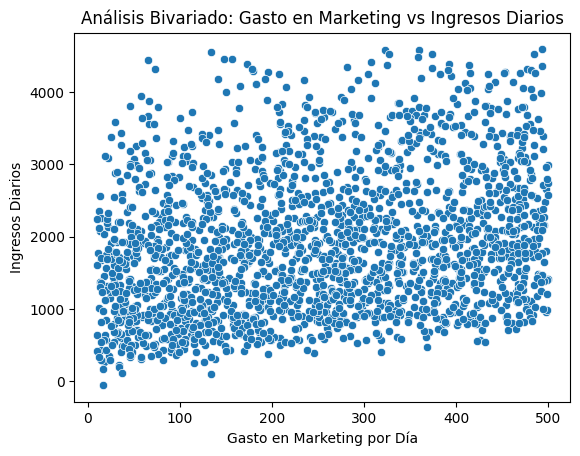

In [18]:
# Análisis bivariado entre 'Marketing_Spend_Per_Day' y 'Daily_Revenue'
sns.scatterplot(x='Marketing_Spend_Per_Day', y='Daily_Revenue', data=store)
plt.title('Análisis Bivariado: Gasto en Marketing vs Ingresos Diarios')
plt.xlabel('Gasto en Marketing por Día')
plt.ylabel('Ingresos Diarios')
plt.show()

La gráfica muestra una relación positiva entre el gasto en marketing y los ingresos diarios. A medida que aumenta el gasto en marketing, los ingresos diarios también tienden a aumentar.

# **Conclusion**  (Taller 3)

El análisis bivariado revela que el gasto en marketing, el número de clientes por día  tienen una relación positiva con los ingresos diarios de las cafeterías. Incrementar el gasto en marketing y atraer más clientes, especialmente en áreas con alto tráfico peatonal, puede aumentar significativamente los ingresos. Optimizar estas variables es clave para maximizar el rendimiento financiero de las cafeterías.

# **PipeLine**  (Taller 3)

   Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  \
0                          152                 6.74                       14   
1                          485                 4.50                       12   
2                          398                 9.09                        6   
3                          320                 8.48                       17   
4                          156                 7.44                       17   

   Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  \
0                    4                   106.62                     97   
1                    8                    57.83                    744   
2                    6                    91.76                    636   
3                    4                   462.63                    770   
4                    2                   412.52                    232   

   Daily_Revenue  
0        1547.81  
1        2084.68  
2        3118.39 

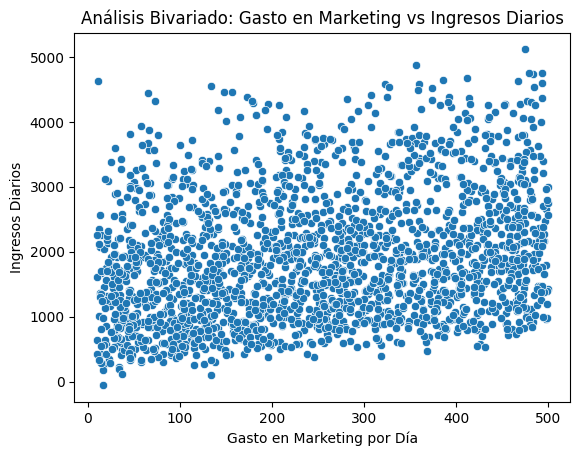

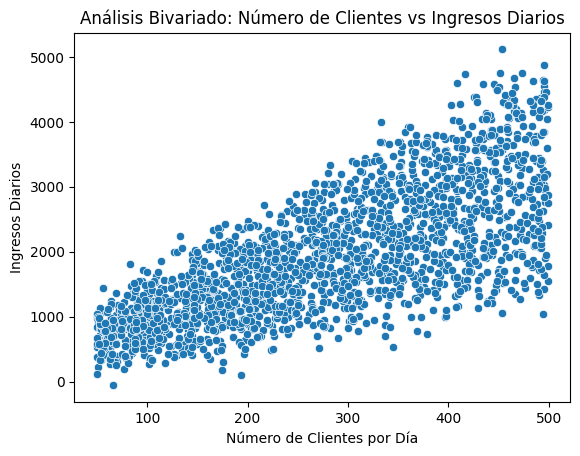

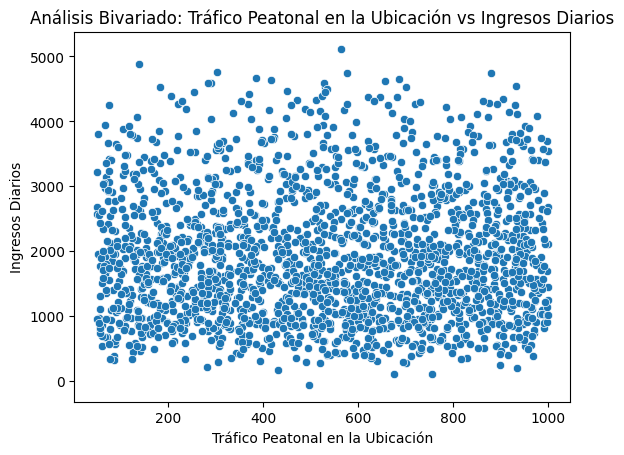

In [33]:

def load_data(file_path):
 data = pd.read_csv(file_path)
 store = pd.DataFrame(data)

def bivariate_analysis(df, x_col, y_col, title, x_label, y_label):
    sns.scatterplot(x=x_col, y=y_col, data=store)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

def main():
    # Cargar los datos
    file_path = 'coffee_shop_revenue.csv'
    df = load_data(file_path)

    # Mostrar las primeras filas del DataFrame para entender su estructura
    print(store.head())

    # Análisis bivariado entre 'Marketing_Spend_Per_Day' y 'Daily_Revenue'
    bivariate_analysis(df, 'Marketing_Spend_Per_Day', 'Daily_Revenue',
                       'Análisis Bivariado: Gasto en Marketing vs Ingresos Diarios',
                       'Gasto en Marketing por Día', 'Ingresos Diarios')

    # Análisis bivariado entre 'Number_of_Customers_Per_Day' y 'Daily_Revenue'
    bivariate_analysis(df, 'Number_of_Customers_Per_Day', 'Daily_Revenue',
                       'Análisis Bivariado: Número de Clientes vs Ingresos Diarios',
                       'Número de Clientes por Día', 'Ingresos Diarios')

    # Análisis bivariado entre 'Location_Foot_Traffic' y 'Daily_Revenue'
    bivariate_analysis(df, 'Location_Foot_Traffic', 'Daily_Revenue',
                       'Análisis Bivariado: Tráfico Peatonal en la Ubicación vs Ingresos Diarios',
                       'Tráfico Peatonal en la Ubicación', 'Ingresos Diarios')

if __name__ == "__main__":
    main()